<a href="https://colab.research.google.com/github/gitboku/statistics-practice/blob/master/%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%83%88%E3%83%AB%E3%83%9E%E3%82%B7%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# サポートベクトルマシンとは

参考：　https://logics-of-blue.com/svm-concept/

外れ値のようなデータまで使うと予測精度が下がるので、本当に必要となるデータのみを使用する。
この「本当に必要なデータ」をサポートベクトルと呼び、これを用いた機械学習がサポートベクトルマシン(Sapport vector machine: SVM)。

## サポートベクトルとは

「マージン最大化」という考え方によって「予測に必要なデータ」を決定する。
マージンとは判別する境界線とデータとの距離。
マージンが大きい場合「ほんの少しデータが変わっただけで誤判定する」ということがなくなる。
境界線と最も近くにあるデータをサポートベクトルと呼ぶ。

境界線とサポートベクトルとのマージンを大きくすることで誤判定を防ぐ。


はっきりとクラス分けできることを前提としたマージンをハードマージンと呼ぶ。
一方、過学習を防ぐためにあえて誤分類をある程度許すようにしたマージンをソフトマージンと呼ぶ。

## ハードマージン

参考： https://kenyu-life.com/2019/02/11/support_vector_machine/

境界線の式を以下のように定義する。
$w$は重み(n次元ベクトル)で、bはバイアス(スカラー)。
$$
w^Tx + b = 0
$$

ここで、$w^Tx + b > 0$となるxの集合を$K_1$とし、$w^Tx + b < 0$となるxの集合を$K_2$とする。

さらに、$K_2$のラベルを-1ということにして、ラベルのベクトルを$t$で表せば、以下のように定義できる。

$$
t_i(w^Tx_i + b) > 0\ (i = 1,2,\cdots,n)
$$

### 境界線とのマージン

2次元でのマージンは点と直線の距離の公式をそのまま使える。

$$
d = \frac {|w_1x_1 + w_2x_2 + b|}{\sqrt{w^2_1 + w^2_2}}
$$

これをn次元用に一般化すると以下のようになる(w, xはn次元ベクトル)。

$$
d = \frac {|w^Tx + b|}{||w||}
$$

ラベルを使用した式に入れ替えると以下のようになる。

$$
\frac {t_i(w^Tx_i + b)}{||w||} \ge M
$$

「この式がすべてのクラスのサポートベクトルに対してマージン最大化する」と「すべてのベクトルが祖のマージンよりも距離が長い」という二つの条件を満たすことで、最適化する。

ここで、両辺をMで割る。

$$
\frac {t_i(w^Tx_i + b)}{M||w||} \ge 1
$$

さらに、以下のように入れ替える。

$$
\begin{eqnarray}
\tilde{w} &=& \frac {w}{M||w||}\\
\tilde{b} &=& \frac {b}{M||w||}
\end{eqnarray}
$$

最終的に以下のようになる。
$$
t_i(\tilde{w}^Tx_i + \tilde{b}) = 1
$$

サポートベクトルに対しては以下の統合が成立するので、これを目的関数とする。

$$
\tilde{M} = \frac {t_i(\tilde{w}^Tx_i + \tilde{b})}{||\tilde{w}||} = \frac {1}{||\tilde{w}||}
$$

この「マージンを最大化する」という目標は「マージンの逆数を最小化する」というように書き換えられる。
よって、以下のように変換する。
二乗や2で割っているのは計算の簡単のため。

$$
\min_{w,b}{\frac {1}{2}} ||w||^2,\ t_i(w^Tx_i + b) \ge 1\ (i=1,2,\cdots,n)
$$

## ソフトマージン

ソフトマージンはハードマージンよりも懸命なSVM。
線形分離不可能なデータだと、マージン内部にサポーベクトル以外のデータが入り込んでいる。

そこで、ハードマージンの式にスラッグ変数$\xi$を導入して制約を弱める。

$$
t_i(w^Tx_i + b) \ge 1 - \xi\\
\xi_i = max{0, M - \frac {t_i(w^Tx_i + b)}{||w||}}
$$

例えば、マージンMが1の時、直線からの距離0.4の位置に別のデータが入り込んでいたとする。
この場合、以下のように制約が小さくなる。

$$
\begin{eqnarray}
\xi_i &=& \max\{0, M - \frac {t_i(w^Tx_i + b)}{||w||}\}\\
\xi_i &=& \max\{0, (1-0.4)\}\\
\xi_i &=& 0.6
\end{eqnarray}
$$

ソフトマージンの目的関数は以下のようになる。

$$
\min\{\frac{1}{2}||w^T||^2 + C\sum_{i=1}^n\xi_i\}
$$

制約条件は以下の通りである。

$$
t_i(w^Tx_i + b) \ge 1 - \xi_i, \xi_i \ge 0\ (i=1,2,\cdots,n)
$$

ここで、Cは正規化係数であり、ペナルティの度合いでもある。
この値が大きくなるほど$\xi$を抑制する力が強くなり、$\xi = \infty$ではハードマージンと同じになる。

## 線形から非線形SVMへの拡張

双対問題を使用することによって、制約条件のない最適化問題への変形をする。

ラグランジュの未定乗数法を使用する。

$$
L(x,a) = f(x) + \sum_{i=1}^n a_ig_i(x)
$$

この時、制約条件は$t_i(w^Tx_i + b) \ge 1 - \xi_i$と$\xi_i \ge 0$の二つあることに注意して、ソフトマージン目的関数と制約条件をラグランジュ関数に当てはめる。

$$
L(w,b,\xi,\alpha,\beta) =\\ \frac{1}{2}||w||^2 + C\sum_{i=1}^n\xi_i - \sum_{i=1}^n\alpha_i\{t_i(w^Tx_i + b) - 1 + \xi_i\} - \sum_{i=1}^n\beta_i\xi_i
$$

これを主変数$(w,b,\xi)$についてそれぞれ偏微分すると、以下のような式がそれぞれ得られる。

$$
\begin{eqnarray}
\frac{\partial L}{\partial w} &=& w - \sum_{i=1}^n \alpha_it_ix_i = 0 &\rightarrow& w = \sum_{i=1}^n\alpha_it_ix_i\\
\frac{\partial L}{\partial b} &=& - \sum_{i=1}^n\alpha_it_i = 0 &\rightarrow& \sum_{i=1}^n\alpha_it_i = 0\\
\frac{\partial L}{\partial \xi} &=& C - \alpha_i - \beta_i = 0 &\rightarrow& C = \alpha_i + \beta_i
\end{eqnarray}
$$

この3つの式をラグランジュ関数に代入すると、以下の式に変形できる。

$$
\max \{\tilde{L}(\alpha) = \sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{i=j}^n\alpha_i\alpha_jt_it_jx_i^Tx_j\}
$$

ここで$b$だけは主問題の制約を利用して導出する。

$$
b = \frac{\max_{t_i=-1}(wx_i) + \min_{t_i=1}(wx_i)}{2}
$$

## カーネルの導入

例えば、2次元空間では線形分離できないデータでも、3次元に拡張すれば線形分離ができるようになる。
前節の最後のラグランジュ関数に代入した目的関数の後ろの$x_i^Tx_j$を$\phi(x)_i^T\phi(x)_j$に変形すると、以下のようになる。

$$
\max \{\tilde{L}(\alpha) = \sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{i=j}^n\alpha_i\alpha_jt_it_j\phi(x)_i^T\phi(x)_j\}
$$

ここで$\phi(x)$は$\phi(x) = (\phi_1(x),\phi_2(x),\cdots,\phi_r(x))$である。

しかし、特徴空間の次元数rは元の次元数nよりも非常に大きいため、内積の計算が難しい。
よって、この特徴ベクトル$\phi(x)_i^T\phi(x)_j$の内積をカーネル関数で置き換える。

ここで、カーネル関数には以下の例がある。

・多項式カーネル
$$
K(x_i,x_j) = (x^T_ix_j)^d
$$
・ガウスカーネル
$$
K(x_i,x_j) = \exp\{{-\frac{||x_i - x_j||^2}{2\sigma^2}}\}
$$
・シグモイドカーネル
$$
K(x_i,x_j) = tanh(bx^T_ix_j + c)
$$

上記の$c, d, \sigma$は別途人間が決定する必要があるハイパーパラメータである。
例えば、$\sigma$は別のクラスの2点間の距離の最も小さいものを選択する。

# 実装

## データ用意

以下のkaggleのページにあるサッカーのデータを利用\\
https://www.kaggle.com/hugomathien/soccer

sqliteファイルだったので、これをgoogleDriveの同じディレクトリに配置して読み込む。

In [0]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from operator import itemgetter

database = '/content/drive/My Drive/statistic/database.sqlite'
conn = sqlite3.connect(database)

In [23]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


## 分析用のデータ作成

目的変数をpotential、説明変数をball_controll, positioning, visionの3つとする。

In [0]:
# この値(%)より上位のpotentialをlabel=1とする。それ以外は0
percent = 75

In [25]:
select_columns = ['potential','ball_control', 'positioning', 'vision']
sql = "select " + ",".join(select_columns) + " from player_attributes;"
data_frame = pd.read_sql(sql, conn)
data_frame.columns = select_columns

# Nanをすべて中央値と入れ替える
def convert_nan_to_nanmedian(rows, label):
  label = label + 's'
  nan_count = 0
  for row in rows:
    if np.isnan(row):
      nan_count += 1
  print('convert ', nan_count, ' ', label, ' to ', np.nanmedian(rows))
  return np.nan_to_num(rows, nan=np.nanmedian(rows))

for label, col in data_frame.items():
  data_frame[label] = convert_nan_to_nanmedian(col, label)

print(data_frame)

convert  836   potentials  to  74.0
convert  836   ball_controls  to  67.0
convert  836   positionings  to  60.0
convert  2713   visions  to  60.0
        potential  ball_control  positioning  vision
0            71.0          49.0         45.0    54.0
1            71.0          49.0         45.0    54.0
2            66.0          49.0         45.0    54.0
3            65.0          48.0         44.0    53.0
4            65.0          48.0         44.0    53.0
...           ...           ...          ...     ...
183973       85.0          85.0         86.0    88.0
183974       80.0          86.0         72.0    88.0
183975       80.0          86.0         72.0    88.0
183976       81.0          91.0         68.0    88.0
183977       81.0          91.0         68.0    88.0

[183978 rows x 4 columns]


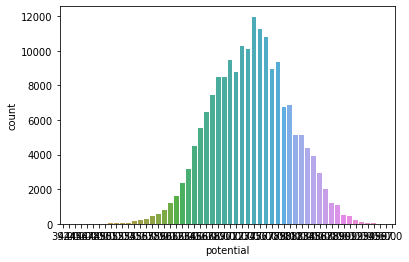

In [26]:
import seaborn as sns

sns.countplot(x='potential', data=data_frame)

In [27]:
# あらかじめ決めてあったpercentの値より上のpotentialを持つものをlabel=1、それ以外をlabel=0とする。
val = np.percentile(data_frame['potential'], percent)
data_frame['potential'] = data_frame['potential'].apply(lambda x: 1 if x > val else 0)

data_frame

,potential,ball_control,positioning,vision
0,0,49.0,45.0,54.0
1,0,49.0,45.0,54.0
2,0,49.0,45.0,54.0
3,0,48.0,44.0,53.0
4,0,48.0,44.0,53.0
...,...,...,...,...
183973,1,85.0,86.0,88.0
183974,1,86.0,72.0,88.0
183975,1,86.0,72.0,88.0
183976,1,91.0,68.0,88.0


In [39]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=data_frame['ball_control'],
    y=data_frame['positioning'],
    z=data_frame['vision'],
    marker=dict(
        color=data_frame['potential'],
        size=3,
        
    )
    )])

fig.show()